웹크롤링 = 좀 더 큰 단위의 용어  
웹 스크랩핑 = 웹크롤링을 하는 과정에서 html 문서에서 특정 태그 부분만 불러오는 것

### div = 구역
- 각각의 div에 a라는 태그를 사용하여 특정한 사이트로 이동할 수 있게 함.  
웹스크래핑할 때 어디 구역이 어떤 부분에 해당되는지 알수있게끔

### span 
- 배경색이나 그런걸 바꿔줄 수 있음

### script 
- 코드를 실행해줌

In [40]:
import requests
url="https://www.python.org/"
resp=requests.get(url)
print(resp)#요청성공

<Response [200]>


response 200 : 성공적으로 데이터를 갖고왔따

In [3]:
url1="https://www.python.org/h"
resp=requests.get(url1)
print(resp) #요청오류 - 웹페이지를 찾을 수 없음

<Response [404]>


### 1. 웹페이지 소스코드 확인해보기

In [4]:
import requests
url="https://www.python.org/"
resp=requests.get(url)
html=resp.text
print(html) # 웹서버의 응답객체는 headers, cookies, text등 여러가지 속성을 갖는다.

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="

### 2. BeautifulSoup 객체 만들기

beautibfulsoup : html 문서 안의 다양한 형태의 태그들이 mix가 되어있는 soup이다. 
뷰티풀하게 태깅해서 꺼내올수있는 라이브러리

In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("https://www.python.org/about/")
bsObj = BeautifulSoup(html.read(), "html.parser")
print(bsObj.h1)
print(bsObj.a)

<h1 class="site-headline">
<a href="/"><img alt="python™" class="python-logo" src="/static/img/python-logo.png"/></a>
</h1>
<a href="#content" title="Skip to content">Skip to content</a>


→ parser를 통해 나온 beautifulsoup 리턴에 h1를 입력해주면 h1에 해당하는 부분의 코드를 출력해준다

In [6]:
url1="https://ko.wikipedia.org/wiki/%EC%97%90%EC%9D%B4%EB%B8%8C%EB%9F%AC%ED%96%84_%EB%A7%81%EC%BB%A8"
html = urlopen(url1)
bsObj = BeautifulSoup(html.read(), "html.parser") # 구문해석기 html.parser을 입력
print(bsObj.h1) #html 문서 내용 출력

<h1 class="firstHeading mw-first-heading" id="firstHeading">에이브러햄 링컨</h1>


In [7]:
print(type(bsObj))
print("\n")

<class 'bs4.BeautifulSoup'>




In [8]:
print(bsObj.head)
print("\n")
print(bsObj.body)
print("\n")
print(bsObj.title) #타이틀 태그 요소
print("\n")

<head>
<meta charset="utf-8"/>
<title>에이브러햄 링컨 - 위키백과, 우리 모두의 백과사전</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"ko","wgMonthNames":["","1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"],"wgRequestId":"a507582d-c544-4ca5-aa0f-542225f16032","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"에이브러햄_링컨","wgTitle":"에이브러햄 링컨","wgCurRevisionId":33025835,"wgRevisionId":33025835,"wgArticleId":28256,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["깨진 링크를 가지고 있는 문서","인용 오류 - ISBN","웹아카이브 틀 웹인용 링크","위키데이터 속성 P18을 사용하는 문서","위키데이터 속성 P373을 사용하는 문서","영어 표기를 포함한 문서","핀란드어 표기를 포함한 문서",
"ISNI 식별자를 포함한 위키백과 문서","VIAF 식별자를 포함한 위키백과 문서","WORLDCATID 식별자를 포함한 위키백과 문서","BIBSYS 식별자를 포함한 위키백과 문서","BNC 식별자를 포함한 위키백과 문서","BNE 식별자를 포함한 위키

In [9]:
print(bsObj.title.name) #타이틀 태그 이름
print("\n")

title




In [10]:
print(bsObj.title.string) #타이틀 태그 문자열
print("\n")

에이브러햄 링컨 - 위키백과, 우리 모두의 백과사전




### 크롬 개발자 도구를 사용해보자
→개발자 모드 : 내가 원하는 html 코드가 어떻게 구현됬는지 확인 가능  
→BeautifulSoup 클래스의 find 메소드: html 문서에서 가장 처음으로 만나는 태그를 한개 찾는다.

In [74]:
resp=requests.get(url1)
print(resp)
html=resp.text
print(html)

ConnectionError: HTTPSConnectionPool(host='ko.wikipedia.org', port=443): Max retries exceeded with url: /wiki/%EC%97%90%EC%9D%B4%EB%B8%8C%EB%9F%AC%ED%96%84_%EB%A7%81%EC%BB%A8 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002BC6895A0A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

- find의 목적은 원하는 태그를 찾는 것이다. 태그는 이름(name), 속성(attribute), 속성값(value)로 구성된다. 따라서 find로 이름, 속성, 속성값
을 특정하여 태그를 찾을 수 있다.
- find(name, attrs, recursive, string, **kwargs)
- find_all(name, attrs, recursive, string, **kwargs) : 기준에 맞는 태그를 모두 가져오기 때문에 리스트 타입을 반환한다.

## 태그 이름만 특정
soup.find('p')

### 태그 속성만 특정
soup.find(class_='example')
soup.find(attrs = {'class':'exmaple'})

### 태그 이름과 속성 모두 특정
soup.find('p', class_='example')

### 하위 태그 검색
### find
soup.find('div').find('p')

### select
soup.select_one('div > p')

In [15]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<ul>
<li>Chocolate Cake</li>
<li>Black Forest Cake</li>
<li>Pineapple Cake</li>
</ul>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
soup_tag = soup.find('a')
print(soup_tag)
soup_tag = soup.find('li')
print(soup_tag)
soup_tag = soup.find('p').find('b')
print(soup_tag)
soup_tag = soup.select('p > b')
print(soup_tag)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<li>Chocolate Cake</li>
<b>The Dormouse's story</b>
[<b>The Dormouse's story</b>]


In [17]:
soup_tag = soup.find_all('a')
for x in soup_tag:
    print(x)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


In [19]:
from bs4 import BeautifulSoup
url1="https://ko.wikipedia.org/wiki/%EC%97%90%EC%9D%B4%EB%B8%8C%EB%9F%AC%ED%96%84_%EB%A7%81%EC%BB%A8"
html = urlopen(url1)

soup=BeautifulSoup(html,'html.parser')
image=soup.find(name='img')
print(image)

print("\n")
target_image=soup.find(name='img',attrs={'alt':'일리노이주 하원의원 당선'})
print(target_image)

<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/mobile/copyright/wikipedia.png" width="50"/>


<img alt="일리노이주 하원의원 당선" data-file-height="1030" data-file-width="1030" decoding="async" height="25" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Seal_of_the_United_States_House_of_Representatives.svg/25px-Seal_of_the_United_States_House_of_Representatives.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Seal_of_the_United_States_House_of_Representatives.svg/38px-Seal_of_the_United_States_House_of_Representatives.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Seal_of_the_United_States_House_of_Representatives.svg/50px-Seal_of_the_United_States_House_of_Representatives.svg.png 2x" width="25"/>


In [21]:
import requests
from bs4 import BeautifulSoup
import urllib.request

url1="https://ko.wikipedia.org/wiki/%EC%97%90%EC%9D%B4%EB%B8%8C%EB%9F%AC%ED%96%84_%EB%A7%81%EC%BB%A8"
html = urlopen(url1)
soup=BeautifulSoup(html,'html.parser')
images = soup.find_all(name='img')

for image in images:
    print(image)

<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/mobile/copyright/wikipedia.png" width="50"/>
<img alt="위키백과" class="mw-logo-wordmark" src="/static/images/mobile/copyright/wikipedia-wordmark-ko.svg" style="width: 6.625em; height: 1.5625em;"/>
<img alt="" class="mw-logo-tagline" height="11" src="/static/images/mobile/copyright/wikipedia-tagline-ko.svg" style="width: 6.625em; height: 0.6875em;" width="106"/>
<img alt="Abraham Lincoln O-77 matte collodion print.jpg" data-file-height="2835" data-file-width="2200" decoding="async" height="316" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Abraham_Lincoln_O-77_matte_collodion_print.jpg/245px-Abraham_Lincoln_O-77_matte_collodion_print.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Abraham_Lincoln_O-77_matte_collodion_print.jpg/368px-Abraham_Lincoln_O-77_matte_collodion_print.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Abraham_Lincoln_O-77_matte_collodion_print.j

### 4. 위의 그림파일을 pc에 저장하기

웹페이지에 이미지를 추가 할때 img 태그와 src 속성을 사용 한다.
태그는 이미지를 추가하겠다는 의미를 나타내고 <img src='이미지 경로/>에서 img 태그 안에 src 속성은 이미지가 저장 되있는 경로를 속성값으
로 요구한다.
참고로 src는 source의 약자다.

In [22]:
target_image=soup.find(name='img',attrs={'alt':'Abraham Lincoln head on shoulders photo portrait.jpg'})
print(target_image)

print("\n")
target_image_src=target_image.get('src') #src속성값 추출
print(target_image_src)
print("\n")
target_image_src = "https:" + target_image_src
print(target_image_src)
print("\n")
print('이미지파일 경로: ',target_image_src)

<img alt="Abraham Lincoln head on shoulders photo portrait.jpg" class="thumbborder" data-file-height="3742" data-file-width="2850" decoding="async" height="92" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/44/Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg/70px-Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/44/Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg/105px-Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/44/Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg/140px-Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg 2x" width="70"/>


//upload.wikimedia.org/wikipedia/commons/thumb/4/44/Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg/70px-Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg


https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Abraham_Lincoln_head_on_shoulders_photo_portrait.jpg/70px-Abraham_Lincoln_head_on_shoul

In [23]:
!pwd

'pwd'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [24]:
import urllib.request
url = "https://www.hallym.ac.kr/.resources/hallym_univ_theme/hallym/ko/img/abouthallym/symbol-ui-emblem1.png"
path = "./hallym.png"
urllib.request.urlretrieve(url, path)

('./hallym.png', <http.client.HTTPMessage at 0x2bc61a47d00>)

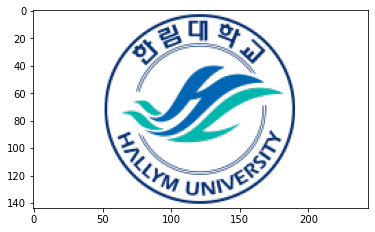

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image = img.imread(path)
plt.imshow(image)
plt.show()

아브라함 링컨의 wiki 페이지에서 img 검색을 하고, Abraham Lincoln head on shoulders photo portrait.jpg를 alt 태그로 가지는 이미지를 찾아서
src에 있는 이미지 파일을 다운로드 하고 이를 화면에 보여준다.

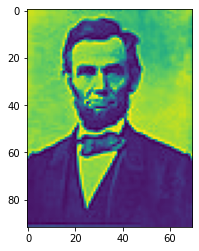

In [77]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.image as img

url1="https://ko.wikipedia.org/wiki/%EC%97%90%EC%9D%B4%EB%B8%8C%EB%9F%AC%ED%96%84_%EB%A7%81%EC%BB%A8"
html = urlopen(url1)

soup=BeautifulSoup(html,'html.parser')
target_image=soup.find(name='img',attrs={'alt':'Abraham Lincoln head on shoulders photo portrait.jpg'})
target_image_src=target_image.get('src')

# 이미지 주소에 http를 붙여준다
url = "https:" + target_image_src
url
path = "./abraham.jpg"
urllib.request.urlretrieve(url, path)
image = img.imread(path)
plt.imshow(image)
plt.show()

### 뉴스 타이틀을 스크래핑해보자

In [30]:
# 네이버 통합 검색창에서 "삼성전자"를 입력하고 뉴스 타이틀을 수집해보자.

import requests
from bs4 import BeautifulSoup
response = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90")

html = response.text
soup = BeautifulSoup(html, "html.parser")
word = soup.select(".news_tit")
print(word)
print("\n")
                        
i = 1
for link in word:
    title = link.text
    print(f"{i}번 기사:", title)
    i = i + 1

[<a class="news_tit" href="https://www.ytn.co.kr/_ln/0102_202207251151377072" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=880000AF_000000000000000001768259&amp;g=052.0001768259&amp;u='+urlencode(this.href));" target="_blank" title='삼성전자, 세계 최초 3나노 파운드리 양산..."TSMC 추격 속도"'><mark>삼성전자</mark>, 세계 최초 3나노 파운드리 양산..."TSMC 추격 속도"</a>, <a class="news_tit" href="https://www.sedaily.com/NewsView/268NQHD76R" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=4&amp;i=88000108_000000000000000004079824&amp;g=011.0004079824&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자, 세계 최초 3나노 파운드리 출하…“無에서 有 창조”"><mark>삼성전자</mark>, 세계 최초 3나노 파운드리 출하…“無에서 有 창조”</a>, <a class="news_tit" href="https://www.yna.co.kr/view/AKR20220725101400003?input=1195m" onclick="return goOtherCR(this, 'a=nws_all*a.tit&amp;r=7&amp;i=880000D8_000000000000000013332442&amp;g=001.0013332442&amp;u='+urlencode(this.href));" target="_blank" title='삼성전자, 세계 첫 3나노 반도체 양산 출하…"한계 넘은 혁신"(종합)'><mark>삼성전자</mark>,

In [32]:
import requests
from bs4 import BeautifulSoup

response = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90")
html = response.text
soup = BeautifulSoup(html, "html.parser")
word = soup.select(".news_tit")
print(word)
print("\n")
                        
i = 1
                        
for link in word:
    title = link.text
    url = link.attrs['href']

[<a class="news_tit" href="https://www.ytn.co.kr/_ln/0102_202207251151377072" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=880000AF_000000000000000001768259&amp;g=052.0001768259&amp;u='+urlencode(this.href));" target="_blank" title='삼성전자, 세계 최초 3나노 파운드리 양산..."TSMC 추격 속도"'><mark>삼성전자</mark>, 세계 최초 3나노 파운드리 양산..."TSMC 추격 속도"</a>, <a class="news_tit" href="https://www.sedaily.com/NewsView/268NQHD76R" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=4&amp;i=88000108_000000000000000004079824&amp;g=011.0004079824&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자, 세계 최초 3나노 파운드리 출하…“無에서 有 창조”"><mark>삼성전자</mark>, 세계 최초 3나노 파운드리 출하…“無에서 有 창조”</a>, <a class="news_tit" href="https://www.yna.co.kr/view/AKR20220725101400003?input=1195m" onclick="return goOtherCR(this, 'a=nws_all*a.tit&amp;r=7&amp;i=880000D8_000000000000000013332442&amp;g=001.0013332442&amp;u='+urlencode(this.href));" target="_blank" title='삼성전자, 세계 첫 3나노 반도체 양산 출하…"한계 넘은 혁신"(종합)'><mark>삼성전자</mark>,

In [33]:
# 검색어를 입력해서 결과 출력해보자.

import requests
from bs4 import BeautifulSoup

keyword = input("검색어 입력:")
response = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=" + keyword)

html = response.text
soup = BeautifulSoup(html, "html.parser")
word = soup.select(".news_tit")

i = 1
for link in word:
    title = link.text
    url = link.attrs['href']
    print(f"{i}번 기사:", title, "\t웹주소 :" , url)
    i = i + 1

검색어 입력:한림대
1번 기사: 한림대성심병원, VR·메타버스 활용 신규간호사 교육 	웹주소 : http://www.segyebiz.com/newsView/20220725522899?OutUrl=naver
2번 기사: 신규 간호사 교육도 이젠 메타버스로 	웹주소 : http://news.mk.co.kr/newsRead.php?no=643316&year=2022
3번 기사: 전국민 항체양성률 조사 논의하는 김동현 한림대 교수 	웹주소 : https://www.news1.kr/photos/view/?5489036
4번 기사: 한림대강남성심병원, 지역 협력병원과 '소통의 꽃' 피워 	웹주소 : http://www.k-health.com/news/articleView.html?idxno=60283


### 주식 가격을 검색해보자

In [34]:
import requests
from bs4 import BeautifulSoup

url="https://finance.naver.com/item/sise.naver?code=005930"

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, "html.parser")
val = soup.select_one("#_nowVal").text
price = val.replace(",","")
price

'61100'

→ select는 부모밑의 자식만 리턴을 해준다. (기본적으로 리스트로 리턴)  
select.one은 하나만 리턴

In [35]:
import requests
from bs4 import BeautifulSoup
codes = ['035720',
        '000660',
        '005930'
        ]

# for문을 돌면서 코드값을 대체해 그 html 코드에 해당이 되는 문서를 읽어와서
# nowVal이라는 값을 찾아서 거기있는 text를 val 값에 집어넣은 다음에
# val값에서 쉼표를 제거하고 출력

for code in codes:
    #f : {} 안에 코드라는 변수를 집어넣으면 변수 값으로 대체를 해준다.
    url=f"https://finance.naver.com/item/sise.naver?code={code}" 
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    val = soup.select_one("#_nowVal").text
    price = val.replace(",","")
    print(price)

73000
100000
61100


### 코스피 / 코스닥 / 코스피 200 현재값

In [49]:
### 코스피 / 코스닥 / 코스피 200 현재값

import urllib.request
from bs4 import BeautifulSoup

url = "https://finance.naver.com/sise/"

page = urllib.request.urlopen(url)
html = page.read()
soup = BeautifulSoup(html, "html.parser")

soup.select("span.num")
soup.select("span.num")[1]
a = soup.select("span.num")
print(len(a), a[1].text, a[2].text, a[3].text) # 코스피 / 코스닥 / 코스피 200
# soup.select("span.num")[1].string
soup.select("span.num")[1].text
float(soup.select("span.num")[1].string.replace(',',''))

4 2,403.69 789.69 318.34


2403.69

In [46]:
# 코스피 / 코스닥 / 코스피 200 현재값
# id 기준으로 검색

import urllib.request
from bs4 import BeautifulSoup

url = "https://finance.naver.com/sise/"

page = urllib.request.urlopen(url)
html = page.read()
soup = BeautifulSoup(html, "html.parser")

print(soup.find(id = 'KOSPI_now'))
soup.find(id = 'KOSPI_now').string

<span class="num" id="KOSPI_now">2,403.69</span>


'2,403.69'

### 코스피 / 코스닥 / 코스피 200 등락율

In [51]:
### 코스피 / 코스닥 / 코스피 200 등락율

import urllib.request
from bs4 import BeautifulSoup

url = "https://finance.naver.com/sise/"

page = urllib.request.urlopen(url)
html = page.read()
soup = BeautifulSoup(html, "html.parser")

soup.find(id = 'KOSPI_change')

# contents는 위의 리턴값을 리스트로 만들어준다.
soup.find(id = 'KOSPI_change').contents

['\n',
 <span class="nup"></span>,
 '10.55 +0.44%',
 <span class="blind">상승</span>,
 '\n']

In [52]:
soup.find(id = 'KOSPI_change').contents[2]

'10.55 +0.44%'

In [56]:
soup.find(id = 'KOSPI_change').contents[2].split()

['10.55', '+0.44%']

In [58]:
soup.find(id = 'KOSPI_change').contents[3].string

'상승'

In [62]:
### 코스피 / 코스닥 / 코스피 200 등락율 (다른 종목)

import urllib.request
from bs4 import BeautifulSoup

url = "https://finance.naver.com/sise/"

stock = soup.select('div.rgt > ul > li > span')
stock[0].string
# print(stock[0])
# print(stock[0].string)

# print("\n")
# stock = soup.select('div.rgt > ul > li > span')
# print(stock[0])
# print(stock[0].string)

'61,100'

### 음악 순위를 검색해보자

벅스 챠트 URL 주소 :
https://music.bugs.co.kr/chart/track/realtime/total?wl_ref=M_contents_03_01

In [71]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = urlopen("https://music.bugs.co.kr/chart/track/realtime/total?wl_ref=M_contents_03_01")
soup = BeautifulSoup(url.read(), 'html.parser')

# musics = soup.find('td', "check")
# print(musics)
# print("title : ", musics.input['title'])
# print("value : ", musics.input['value'])
# print("id : ", musics.input['disc_id'])

# musics = soup.select('td.check')
# print(len(musics))
# print(musics[0])
# print(musics[0].input['title'])

# 앨범명 불러오기
music = soup.select('td > a.album')
# print(music[0])
# print(music[0].get('title'))
print(music[0].text)

Somebody


In [37]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = urlopen("https://music.bugs.co.kr/chart/track/realtime/total?wl_ref=M_contents_03_01")
soup = BeautifulSoup(url.read(), 'html.parser')

musics = soup.find_all('td', "check")

for music in musics:
    print(music.input['title'])

Somebody!
그때 그 순간 그대로 (그그그)
보고싶었어
사랑이야
SNEAKERS
Girls
POP!
I Ain't Worried
LOVE DIVE
BEAUTIFUL MONSTER
Sparkling
Clink Clink (클링 클링)
도깨비불 (Illusion)
나의 X에게
열이올라요 (Heart Burn)
정이라고 하자 (Feat. 10CM)
That That (prod. & feat. SUGA of BTS)
그라데이션
LOVE me
바보에게 바보가 (웹툰 '연애의 발견' X 이석훈)
TOMBOY
FEARLESS
I LOVE U
Lemon
_WORLD
Stay This Way
달빛바다
Love story
ELEVEN
Yet To Come
Left and Right (Feat. Jung Kook of BTS)
사랑인가 봐
SMILEY (Feat. BIBI)
아무래도 난
사랑은 늘 도망가
Off My Face
팡파레
That's Hilarious
Feel My Rhythm
SEOUL DRIFT
MY BAG
Next Level
우리들의 블루스
Playlist
Butter
봄여름가을겨울 (Still Life)
어마어마해
Life′s Too Short (English Ver.)
다정히 내 이름을 부르면
신호등
늦은 밤 헤어지긴 너무 아쉬워
Weekend
Daydream (백일몽)
STAY
항상 (HANGSANG) Feat. Supreme Boi
Base Line
P.O.P (Piece Of Peace) Pt.1
Hope World
Chicken Noodle Soup (feat. Becky G)
Blue Side
Airplane
너의 모든 순간
드라마
내가 아니라도
취중고백
INVU
없었던 일로
strawberry moon
Dynamite
참고사항
GANADARA (Feat. 아이유)
봄 to 러브
러브 쉿!
Drive
HOT
Happy Song
I Just Called
듣고 싶을까
낭만교향곡 (Feat. CHANGMO, 박재범)
Light Switch
Way Ba

In [38]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = urlopen("https://music.bugs.co.kr/chart/track/realtime/total?wl_ref=M_contents_03_01")
soup = BeautifulSoup(url.read(), 'html.parser')

musics = soup.find_all('td', "check")

i = 1
for music in musics:
    title = music.input['title']
    print(f"{i}위 :", title)
    i = i + 1

1위 : Somebody!
2위 : 그때 그 순간 그대로 (그그그)
3위 : 보고싶었어
4위 : 사랑이야
5위 : SNEAKERS
6위 : Girls
7위 : POP!
8위 : I Ain't Worried
9위 : LOVE DIVE
10위 : BEAUTIFUL MONSTER
11위 : Sparkling
12위 : Clink Clink (클링 클링)
13위 : 도깨비불 (Illusion)
14위 : 나의 X에게
15위 : 열이올라요 (Heart Burn)
16위 : 정이라고 하자 (Feat. 10CM)
17위 : That That (prod. & feat. SUGA of BTS)
18위 : 그라데이션
19위 : LOVE me
20위 : 바보에게 바보가 (웹툰 '연애의 발견' X 이석훈)
21위 : TOMBOY
22위 : FEARLESS
23위 : I LOVE U
24위 : Lemon
25위 : _WORLD
26위 : Stay This Way
27위 : 달빛바다
28위 : Love story
29위 : ELEVEN
30위 : Yet To Come
31위 : Left and Right (Feat. Jung Kook of BTS)
32위 : 사랑인가 봐
33위 : SMILEY (Feat. BIBI)
34위 : 아무래도 난
35위 : 사랑은 늘 도망가
36위 : Off My Face
37위 : 팡파레
38위 : That's Hilarious
39위 : Feel My Rhythm
40위 : SEOUL DRIFT
41위 : MY BAG
42위 : Next Level
43위 : 우리들의 블루스
44위 : Playlist
45위 : Butter
46위 : 봄여름가을겨울 (Still Life)
47위 : 어마어마해
48위 : Life′s Too Short (English Ver.)
49위 : 다정히 내 이름을 부르면
50위 : 신호등
51위 : 늦은 밤 헤어지긴 너무 아쉬워
52위 : Weekend
53위 : Daydream (백일몽)
54위 : STAY
55위 : 항상 (HA

In [72]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = urlopen("https://music.bugs.co.kr/chart/track/realtime/total?wl_ref=M_contents_03_01")
soup = BeautifulSoup(url.read(), 'html.parser')

# 가수명 읽어오기
musics_artist = soup.find_all('p', "artist")
print(type(musics_artist[0]))
print(musics_artist[0])
print(musics_artist[0].a['title'])
print('\n===============================')

i = 1
for music in musics_artist:
    print(f"{i}위 :", music.text)
    i = i + 1
    if i == 10:
        break

<class 'bs4.element.Tag'>
<p class="artist">
<!-- a tag title -->
<a class="artistTitle" href="https://music.bugs.co.kr/artist/80132051?wl_ref=list_tr_10_chart" title="로꼬">로꼬</a>
<!-- a tag link -->
<a class="more" href="javascript:void(0);" name="atag_martist_list" onclick="bugs.layermenu.openMultiArtistSearchResultPopLayer(this, '로꼬||로꼬||80132051||OK\\n화사||화사(Hwa Sa)||80177861||OK', ''); return false;" title="아티스트 전체보기" wise_log_str="?wl_ref=list_tr_10_chart">
로꼬
</a> </p>
로꼬

1위 : 

로꼬


로꼬
 
2위 : 
WSG워너비 (가야G)

3위 : 
WSG워너비 (4FIRE)

4위 : 
ITZY (있지)

5위 : 
aespa

6위 : 
케이시

7위 : 
OneRepublic(원리퍼블릭)

8위 : 
나연 (TWICE)

9위 : 
IVE (아이브)



### 웹툰 순위를 검색하고 데이터를 저장해보자

In [79]:
import csv

data = [
    ['GRADE', 'KimYS', 'SoJM', 'JungYW'],
    ['KOR', '70', '82', '90'],
    ['MATH', '67', '73', '89'],
    ['ENG', '86', '88', '84'],
    ['PROG', '90', '79', '80']
]

# 파일 생성하기
f = open("sample.csv", "w")
writer = csv.writer(f)
writer.writerows(data) # 열 단위로 데이터를 써 주겠다
f.close()

# 생성한 파일 오픈
f = open("sample.csv", "r")
reader = csv.reader(f)

# reader에 있는 걸 한 줄 씩 가져온다
for row in reader:
    print(row)
    
f.close()

['GRADE', 'KimYS', 'SoJM', 'JungYW']
[]
['KOR', '70', '82', '90']
[]
['MATH', '67', '73', '89']
[]
['ENG', '86', '88', '84']
[]
['PROG', '90', '79', '80']
[]


In [86]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'http://comic.naver.com/webtoon/weekday'
filename = 'naverwebtoon.csv'

res = requests.get(url)
# res.raise_for_status()

soup = BeautifulSoup(res.text, 'lxml')
cartoonsBox = soup.find('ol', attrs={"class" : "asideBoxRank"})
cartoons = cartoonsBox.find_all('a') # a 태그 찾아오기
#print(cartoons)
#print(type(cartoons[0]))
#print(cartoons[0].get('title'))
print('\n')

i = 1
for cartoon in cartoons:
    title = cartoon.get('title')
    print(f"{str(i)} th : {title}")
    i += 1



1 th : 김부장-39화 성한수의 낭만!
2 th : 마루는 강쥐-7화. 강적 등장!
3 th : 멸망 이후의 세계-제 25 화
4 th : 내가 키운 S급들-40화 : 지금은 약한 척
5 th : 참교육-90화
6 th : 퀘스트지상주의-40화 왜 그래 여보
7 th : 소녀의 세계-2부 110화
8 th : 집이 없어-171화. 우정과 전쟁 (5)
9 th : 백수세끼-136화 라멘
10 th : 로잘린 보가트-프롤로그


### 2. 정규형 적용

### (1) 아이디 추출

In [10]:
import re
import urllib.request

url = "http://v3clinic.ahnlab.com/v3clinic/site/notice/noticeView.do?boardSeq=50109041"

html = urllib.request.urlopen(url)
html_contents = str(html.read())

# html_content에서 이런포맷으로 된 걸 찾아라
# 대문자 A부터 Z까지, 소문자 a부터 z까지, 숫자 0에서 9까지 가능한 
id_results = re.findall(r"([A-Za-z0-9]+\*\*\*)", html_contents)

for i in id_results:
    print(i)

jw91***
kangent2***
1304***
enrj***
maimu***
wlis1***
le***
hjr***
jklee***
mjsi***
goldman***
daewip***
sangsu***
bym0***
iyj***
pros***
jhj1972***
kls***
yunw***
neurosu***
ro***
ts***
bagiomp***
mj0***
rkd***
placid***
wne***
css***
song***
hks***
kskim4***
holyl***
kiend***
jihong1***
dhj***
redwindm***
freeh***
netiss***
leehu2***
imdrh***
kbw***
jeje1***
wintertig***
chi***
knic***
tiger***
bh2***
sk9***
ks***
sungj***
namoo1***
chi0***
asd***
ldw***
ks***
lanma0***
ksu***
rhee***
suri***
tiny***
giil***
asan***
soea***
lyc***
amyl***
mws***
djp4***
lee0***
einjin0***
rcy0***
kjh3***
hyang***
kuaile***
iho***
unidr***
sc***
jjin***
wangs***
progr***
jangwonj***
k7713***
njinc***
hanam***
jeongjae***
cano***
csjeun***
sicl***
ckh1***
cosmos***
muka***
rjg2***
meehyouk***
kingdo***
jjh***
syk***
ldorado***
wds***
jinsp***
o2y***
hnjin0***
forcho***
siera***
pmin***
choih***
sun9***
tagian***
m***
mma***
clay***
cj***
gong***
tmal***
oe1***
tinach***
how2k***
han***
jop***
ahnlab***

In [11]:
type(id_results)

list

In [12]:
len(id_results)

120

In [13]:
with open("id.txt","w") as f:
    for result in id_results:
        f.write(result)
f.close()

In [14]:
# 한 줄 씩 아이디를 작성하자

with open('id1.txt', 'w') as f:
    for result in id_results:
        content = "%s\n" %result
        f.write(content)

In [15]:
# 화면에 보이자

file = open("id1.txt", 'r')
content = file.read()
print(content)
file.close()

jw91***
kangent2***
1304***
enrj***
maimu***
wlis1***
le***
hjr***
jklee***
mjsi***
goldman***
daewip***
sangsu***
bym0***
iyj***
pros***
jhj1972***
kls***
yunw***
neurosu***
ro***
ts***
bagiomp***
mj0***
rkd***
placid***
wne***
css***
song***
hks***
kskim4***
holyl***
kiend***
jihong1***
dhj***
redwindm***
freeh***
netiss***
leehu2***
imdrh***
kbw***
jeje1***
wintertig***
chi***
knic***
tiger***
bh2***
sk9***
ks***
sungj***
namoo1***
chi0***
asd***
ldw***
ks***
lanma0***
ksu***
rhee***
suri***
tiny***
giil***
asan***
soea***
lyc***
amyl***
mws***
djp4***
lee0***
einjin0***
rcy0***
kjh3***
hyang***
kuaile***
iho***
unidr***
sc***
jjin***
wangs***
progr***
jangwonj***
k7713***
njinc***
hanam***
jeongjae***
cano***
csjeun***
sicl***
ckh1***
cosmos***
muka***
rjg2***
meehyouk***
kingdo***
jjh***
syk***
ldorado***
wds***
jinsp***
o2y***
hnjin0***
forcho***
siera***
pmin***
choih***
sun9***
tagian***
m***
mma***
clay***
cj***
gong***
tmal***
oe1***
tinach***
how2k***
han***
jop***
ahnlab***